# linear_algebra(선형대수)

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib

import seaborn as sns


import scipy as sp
from scipy import stats


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## numpy를 활용한 선형 대수

### 데이터 유형

#### 붓꽃 데이터에서 첫 번째 꽃의 크기 가져오기 

In [2]:
from sklearn.datasets import load_iris  # 사이킷런 패키지 임포트

iris = load_iris()  # 데이터 로드
iris.data[0, :]  # 첫 번째 꽃의 데이터

array([5.1, 3.5, 1.4, 0.2])

#### vector 표현

In [3]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [4]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1

array([5.1, 3.5, 1.4, 0.2])

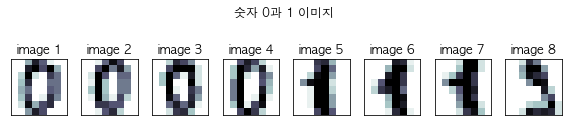

In [5]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("숫자 0과 1 이미지")
plt.tight_layout()
plt.show()

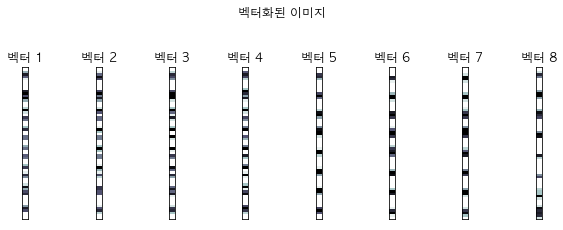

In [6]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("벡터 {}".format(i + 1))
plt.suptitle("벡터화된 이미지", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

#### Matrix

In [8]:
A = np.array([[11,12,13],[21,22,23]])
A

array([[11, 12, 13],
       [21, 22, 23]])

#### Tensor

In [9]:
# 텐서
from scipy import misc # 패키지 임포트 
img_rgb = misc.face() # 컬러 이미지 로드
img_rgb.shape # 데이터의 모양

(768, 1024, 3)

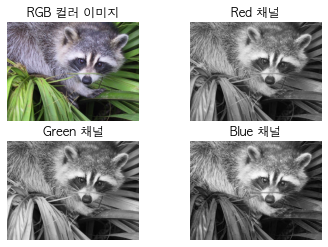

In [10]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

### 행렬 연산

#### 행렬의 전치

In [12]:
ar = np.array([[1,2,3], [4,5,6]])
print(ar)
print()
print(ar.T)

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]


In [14]:
ar = np.array([[[1,2],[3,4],[5,6]],[[71,72],[73,74],[75,76]]])
print(ar.transpose())
print('----------------------')
print(ar.transpose(2,1,0))
print('----------------------')
print(ar.transpose(1,0,2))

[[[ 1 71]
  [ 3 73]
  [ 5 75]]

 [[ 2 72]
  [ 4 74]
  [ 6 76]]]
----------------------
[[[ 1 71]
  [ 3 73]
  [ 5 75]]

 [[ 2 72]
  [ 4 74]
  [ 6 76]]]
----------------------
[[[ 1  2]
  [71 72]]

 [[ 3  4]
  [73 74]]

 [[ 5  6]
  [75 76]]]


### 특수한 행렬

#### 영벡터 와 일벡터

In [15]:
b1 = np.zeros((5,5)) # 0으로 채원진 5x5 크기의 배열 생성
print(b1)
print()

b2 = np.ones(10) # 1로 채원진 10 크기의 (1차원) 배열 생성
print(b2)
print()

er = np.empty( (2,2) ) # 가비지 값으로 채원진 2x2 크기의 배열 생성
print(er)
print()

like_one = np.ones_like(er)
print(like_one)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[[-5.000e-01  7.675e+02]
 [ 1.024e+03 -5.000e-01]]

[[1. 1.]
 [1. 1.]]


#### 대각 행렬

In [16]:
#대각 행렬 생성
ar = np.diag([1, 2, 3])
print(ar)
print()

#2*2 항등 행렬 생성
ar = np.identity(2)
print(ar)
print()

ar = np.eye(2)
print(ar)
print()

#3*3 행렬을 만들고 가운데에서 대각선 방향으로 위쪽에 1을 채움
ar = np.eye(3, k=1)
print(ar)
print()

#3*4 행렬을 만들고 가운데에서 대각선 방향으로 위쪽에 1을 채움
ar = np.eye(3, M=4, k=1)
print(ar)
print()

[[1 0 0]
 [0 2 0]
 [0 0 3]]

[[1. 0.]
 [0. 1.]]

[[1. 0.]
 [0. 1.]]

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]



### 벡터 와 행렬의 연산

#### 벡터 연산

In [17]:
x = np.array([10, 11, 12, 13, 14]) 
y = np.array([0, 1, 2, 3, 4])

print(x + y)

print(x - y)

result = np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])
print(result)

[10 12 14 16 18]
[10 10 10 10 10]
[[14 24]
 [34 44]]


#### 브로드캐스팅 연산

In [18]:
ar = np.array([1,2,3])
br = np.array([4,5,6])
cr = np.array([[6,7,8], [10,20,30]])

result = ar * 2 #배열의 모든 요소에 2를 곱한 결과
print(result)
print()

result = ar + br; #배열 간의 덧셈: 동일한 위치간의 덧셈을 한 결과
print(result)
print()

result = ar + cr #작은 차원인 ar 의 모든 데이터를 cr에 덧셈
print(result)
print()

dr = np.array([1,2])
result = ar + dr #차원은 1차원으로 같은데 데이터 개수가 달라서 에러

[2 4 6]

[5 7 9]

[[ 7  9 11]
 [11 22 33]]



ValueError: operands could not be broadcast together with shapes (3,) (2,) 

#### 벡터의 내적(dot)

In [25]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

print(np.dot(x.T, y))

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(x @ y)

[[32]]
32


In [21]:
#단순 평균
x = np.arange(10)
N = len(x)

print(np.ones(N) @ x / N)

print(x.mean())

4.5
4.5


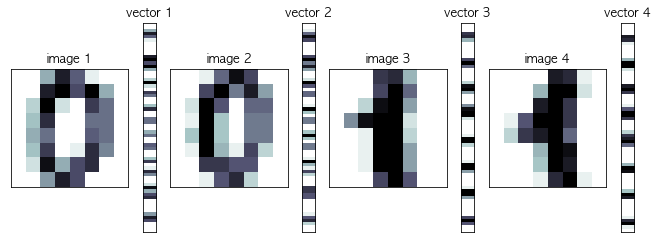

In [22]:
#유사도 - 이미지 가져오기
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [23]:
#유사도 - 동일한 이미지의 내적
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [24]:
#유사도 - 동일하지 않은 이미지의 내적
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

#### 행렬 곱셈

In [26]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[1, 2], [3, 4], [5, 6]])
#행렬의 곱
mat = np.dot(x, y)
#1*1 + 2*3 + 3*5
#1*2 + 2*4 + 3*6

#4*1+5*3+6*5
#4*2+5*4+6*6
print(mat)

mat = x @ y
print(mat)
print()

x = np.array([1, 2, 3]) 
y = np.array([4, 5, 6])
result = x @ y
print(result)

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]

32


In [28]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

print(A @ B)
print(A @ B)
print('----------------')

print(A @ (B + C))
print(A @ B + A @ C)
print('----------------')

print((A + B) @ C)
print(A @ C + B @ C)
print('----------------')

print((A + B).T)
print(A.T + B.T)
print('----------------')

print((A @ B).T)
print(B.T @ A.T)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
----------------
[[42 42]
 [98 98]]
[[42 42]
 [98 98]]
----------------
[[110  96]
 [174 152]]
[[110  96]
 [174 152]]
----------------
[[ 6 10]
 [ 8 12]]
[[ 6 10]
 [ 8 12]]
----------------
[[19 43]
 [22 50]]
[[19 43]
 [22 50]]


In [30]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)

print(A @ I)
print(I @ A)

[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]


#### 이미지 모핑

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/adam/scikit_learn_data


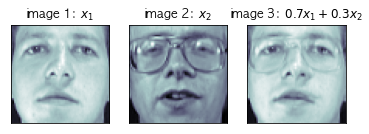

In [31]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

#### 벡터의 이차 형식

In [32]:
x = np.array([1, 2, 3])
print(x)

A = np.arange(1, 10).reshape(3, 3)
print(A)

print(x.T @ A @ x)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
228


### 벡터의 성질

#### 대각합

In [33]:
vector = np.eye(3)
print(vector)
print(np.trace(vector))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
3.0


#### 행렬식

In [36]:
mat = np.array([[1, 2],
                [3, 4]])
print(np.linalg.det(mat))

mat = np.array([[1, 1, 1],
                [4, 1, 6], 
                [7, 8, 1]])
print(np.linalg.det(mat))

-2.0000000000000004
15.999999999999998


### 희소 행렬

In [37]:
from scipy import sparse

ar = np.eye(3, k=1)
print(ar)
print()

# CSR 행렬을 만듭니다.
sp = sparse.csr_matrix(ar)
print(sp)
print()

#원래의 ndarray로 변환
br = sp.toarray()
print(br)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]

  (0, 1)	1.0
  (1, 2)	1.0

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


### 선형 연립 방정식 과 역행렬

#### 역행렬

In [41]:
mat = np.array([[1, 2],
                [3, 4]])
#역행렬
print(np.linalg.inv(mat))

#행렬과 역행렬의 행렬의 곱
print(np.dot(mat,np.linalg.inv(mat) ))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00e+00 1.11e-16]
 [0.00e+00 1.00e+00]]


In [44]:
#연립 방정식 해결
'''
    x1 + x2 = 2
    x2 + x3 = 2
    x1 + x2 + x3 = 3
'''

A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
print(A)

Ainv = np.linalg.inv(A)
print(Ainv)

b = np.array([[2], [2], [3]])
print(b)

x = Ainv @ b
print(x)

[[1 1 0]
 [0 1 1]
 [1 1 1]]
[[ 0. -1.  1.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]
[[2]
 [2]
 [3]]
[[1.]
 [1.]
 [1.]]


In [45]:
x, resid, rank, s = np.linalg.lstsq(A, b)
print(x)

[[1.]
 [1.]
 [1.]]


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_38206/2970948546.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(A, b)


#### 최소 자승 문제

In [50]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 2]])
print(A)

b = np.array([[2], [2], [3], [4.1]])
print(b)

x, resid, rank, s = np.linalg.lstsq(A, b)
print(x)

print(A @ x)

[[1 1 0]
 [0 1 1]
 [1 1 1]
 [1 1 2]]
[[2. ]
 [2. ]
 [3. ]
 [4.1]]
[[1.033]
 [0.95 ]
 [1.05 ]]
[[1.983]
 [2.   ]
 [3.033]
 [4.083]]


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_38206/3082304051.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(A, b)
